<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/09.01-Chau-Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Under construction 🚧

This notebook shows how to use functions from `control` to solve the examples from [Chapter 8](https://ia802909.us.archive.org/32/items/process-control-a-first-course-with-matlab/Process%20Control%20A%20First%20Course%20with%20MATLAB.pdf#page=163) of Pao C. Chau, Process Control: A First Course with MATLAB.

>N.B.: Parts of this notebook were taken from [here](https://github.com/alchemyst/Dynamics-and-Control/blob/master/1_Dynamics/8_Frequency_domain/Frequency%20response%20plots.ipynb)

In [1]:
!pip install control
from control.matlab import tf, bode, nyquist, nichols, damp, logspace
from math import pi

     |████████████████████████████████| 357 kB 8.4 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=2b53d39a73f790f0f95cccee84d387576193ea616dcea909540455801c028c58
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

## Graphical Analysis Tools

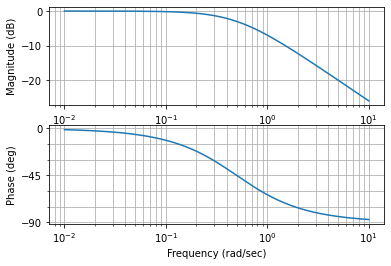

In [5]:
# Example 8.2, p. 153
# Python and MATLAB codes
kp = 1                      # kp=1; % Just arbitrary values. Try different ones yourself.
tau = 2                     # tau=2;
G = tf(kp, [tau, 1])        # G=tf(kp,[tau 1]);
mag, phase, omega = bode(G) # figure(1), bode(G);

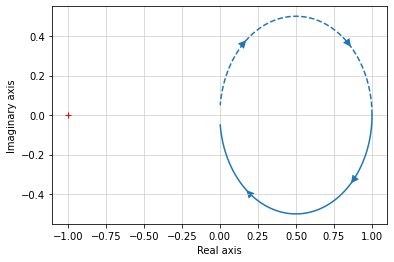

In [7]:
real, imag, omega = nyquist(G) # figure(2), nyquist(G); % If the Nyquist default plot is
                               # % confusing,
                               # % follow the instructions in MATLAB Session 7

_____Eigenvalue______ Damping___ Frequency_
      -0.1   +0.4899j        0.2        0.5
      -0.1   -0.4899j        0.2        0.5


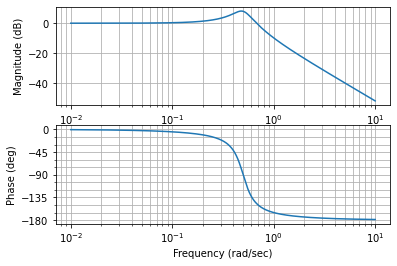

In [12]:
# Example 8.3, p. 155
# Python and MATLAB codes
k = 1                               # k=1; % Just arbitrary values. Try different ones yourself.
tau = 2                             # tau=2;
zeta = 0.2                          # zeta=0.2;
G = tf(k, [tau*tau, 2*zeta*tau, 1]) # G=tf(k,[tau*tau 2*zeta*tau 1]);
damp(G)                             # damp(G) % confirm the damping ratio
mag, phase, omega = bode(G)         # figure(1), bode(G);

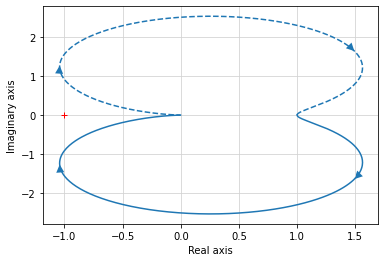

In [9]:
real, imag, omega = nyquist(G) # figure(2), nyquist(G);

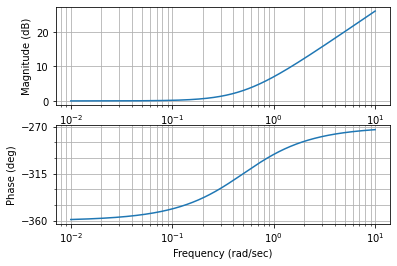

In [13]:
# Example 8.4, p. 157
# Python and MATLAB codes
taud = 2                    # taud=2; % Just an arbitrary value
G = tf([taud, 1], 1)        # G=tf([taud 1],1);
mag, phase, omega = bode(G) # figure(1), bode(G);

In [17]:
# Not working!
# real, imag, omega = nyquist(G)  # figure(2), nyquist(G);

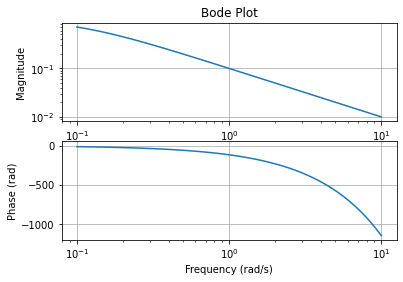

In [50]:
# Example 8.6, p. 158
# Python and MATLAB codes
kp = 1                 # kp=1; % Some arbitrary values
taup = 10              # taup=10;
G = tf(kp, [taup, 1])  # G=tf(kp,[taup 1]);
tdead = 2              # tdead=2;
omega = logspace(-1,1) # freq=logspace(-1,1); % Make a frequency vector
mag, phase, _ = bode(G, omega, dB=False, deg=False, plot=False) # [mag,phase]=bode(G,freq);
                                                                # mag=mag(1,:); phase=phase(1,:); % MATLAB specific step
phase = phase - ((180/pi)*tdead*omega)       # phase = phase - ((180/pi)*tdead*freq); % Add dead-time phase lag
fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
ax_mag.loglog(omega, mag)                    # figure(1);
                                             # subplot(211), loglog(freq,mag)
ax_mag.set_ylabel('Magnitude')               # ylabel('Magnitude'),title('Bode Plot'), grid
ax_mag.set_title('Bode Plot')                                          
ax_mag.grid()   
ax_phase.semilogx(omega, phase)              # subplot(212), semilogx(freq,phase)
ax_phase.set_xlabel('Frequency (rad/s)')     # ylabel('Phase (degree)'),xlabel('Frequency'), grid
ax_phase.set_ylabel('Phase (rad)')
ax_phase.grid()

#figure(2) % We have to switch over to the polar plot
#phase=phase*pi/180; % function to do this Nyquist plot
#polar(phase,mag)